In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
dataframe = pd.read_csv('titanic.csv')

In [ ]:
dataframe.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [ ]:
dataframe.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [ ]:
dataframe.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
dataframe.shape

(891, 12)

In [ ]:
dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(dataframe["Age"])
print(dataframe["Age"].min())
print(dataframe["Age"].max())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0.42
80.0


In [ ]:
dataframe.drop(["Name", "Ticket", "SibSp", "Parch", "Cabin"], axis=1, inplace=True)
print(dataframe)

     PassengerId  Survived  Pclass     Sex   Age     Fare Embarked
0              1         0       3    male  22.0   7.2500        S
1              2         1       1  female  38.0  71.2833        C
2              3         1       3  female  26.0   7.9250        S
3              4         1       1  female  35.0  53.1000        S
4              5         0       3    male  35.0   8.0500        S
..           ...       ...     ...     ...   ...      ...      ...
886          887         0       2    male  27.0  13.0000        S
887          888         1       1  female  19.0  30.0000        S
888          889         0       3  female   NaN  23.4500        S
889          890         1       1    male  26.0  30.0000        C
890          891         0       3    male  32.0   7.7500        Q

[891 rows x 7 columns]


In [ ]:
# StandardScaler
scaler = preprocessing.StandardScaler()

In [ ]:
fare = dataframe["Fare"].values
print(fare)

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.       7.8958  41.5792   7.8792   8.05    15.5      7.75
  21.6792  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5
  10.5      7.2292  27.75    46.9      7.2292  80.      83.475   27.9
  27.7208  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9
  73.5     14.4542  56.4958   7.65     7.8958   8.05    29.      12.475
   9.       9.5      7.7875  47.1     10.5     15.85    34.375    8.05
 263.       8.05     8.05     7.8542  61.175   20.575    7.25     8.05
  34.6542  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542
   7.925    7.8958   7.65     7.775    7.8958  24.15    52.      14.4542
  

In [ ]:
fare_scaled = scaler.fit_transform(fare.reshape(-1, 1))
print(fare_scaled)

[[-5.02445171e-01]
 [ 7.86845294e-01]
 [-4.88854258e-01]
 [ 4.20730236e-01]
 [-4.86337422e-01]
 [-4.78116429e-01]
 [ 3.95813561e-01]
 [-2.24083121e-01]
 [-4.24256141e-01]
 [-4.29555021e-02]
 [-3.12172378e-01]
 [-1.13845709e-01]
 [-4.86337422e-01]
 [-1.87093118e-02]
 [-4.90279793e-01]
 [-3.26266659e-01]
 [-6.19988892e-02]
 [-3.86670720e-01]
 [-2.85997284e-01]
 [-5.02948539e-01]
 [-1.24919787e-01]
 [-3.86670720e-01]
 [-4.86756223e-01]
 [ 6.63597416e-02]
 [-2.24083121e-01]
 [-1.64441595e-02]
 [-5.02948539e-01]
 [ 4.64700108e+00]
 [-4.89776426e-01]
 [-4.89442190e-01]
 [-9.02720170e-02]
 [ 2.30172882e+00]
 [-4.92377828e-01]
 [-4.37007438e-01]
 [ 1.00606170e+00]
 [ 3.98582080e-01]
 [-5.02863973e-01]
 [-4.86337422e-01]
 [-2.85997284e-01]
 [-4.22073541e-01]
 [-4.57645492e-01]
 [-2.25593223e-01]
 [-4.89442190e-01]
 [ 1.88762532e-01]
 [-4.89776426e-01]
 [-4.86337422e-01]
 [-3.36334002e-01]
 [-4.92377828e-01]
 [-2.11917743e-01]
 [-2.90024222e-01]
 [ 1.50673744e-01]
 [-4.91371093e-01]
 [ 8.9649678

In [ ]:
dataframe["Fare_StandardScaler"] = fare_scaled
dataframe.head(7)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_StandardScaler
0,1,0,3,male,22.0,7.2500,S,-0.502445
1,2,1,1,female,38.0,71.2833,C,0.786845
2,3,1,3,female,26.0,7.9250,S,-0.488854
3,4,1,1,female,35.0,53.1000,S,0.420730
4,5,0,3,male,35.0,8.0500,S,-0.486337
5,6,0,3,male,NaN,8.4583,Q,-0.478116
6,7,0,1,male,54.0,51.8625,S,0.395814


In [ ]:
scaler = preprocessing.MinMaxScaler()

In [ ]:
fare_scaled = scaler.fit_transform(fare.reshape(-1,1))
print(fare_scaled)

[[0.01415106]
 [0.13913574]
 [0.01546857]
 [0.1036443 ]
 [0.01571255]
 [0.0165095 ]
 [0.10122886]
 [0.04113566]
 [0.02173075]
 [0.05869429]
 [0.03259623]
 [0.05182215]
 [0.01571255]
 [0.06104473]
 [0.01533038]
 [0.03122992]
 [0.05684821]
 [0.02537431]
 [0.03513366]
 [0.01410226]
 [0.05074862]
 [0.02537431]
 [0.01567195]
 [0.06929139]
 [0.04113566]
 [0.06126432]
 [0.01410226]
 [0.51334181]
 [0.01537917]
 [0.01541158]
 [0.0541074 ]
 [0.28598956]
 [0.01512699]
 [0.02049464]
 [0.16038672]
 [0.10149724]
 [0.01411046]
 [0.01571255]
 [0.03513366]
 [0.02194234]
 [0.01849397]
 [0.04098927]
 [0.01541158]
 [0.08115719]
 [0.01537917]
 [0.01571255]
 [0.03025399]
 [0.01512699]
 [0.04231498]
 [0.03474329]
 [0.07746484]
 [0.01522459]
 [0.14976542]
 [0.05074862]
 [0.12097534]
 [0.06929139]
 [0.02049464]
 [0.01411046]
 [0.05416439]
 [0.0915427 ]
 [0.01411046]
 [0.1561496 ]
 [0.16293235]
 [0.05445717]
 [0.0541074 ]
 [0.02975782]
 [0.02049464]
 [0.01592394]
 [0.01546857]
 [0.01690807]
 [0.02049464]
 [0.09

In [ ]:
dataframe['Fare_MinMaxScaler'] = fare_scaled
dataframe.head(7)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_StandardScaler,Fare_MinMaxScaler
0,1,0,3,male,22.0,7.2500,S,-0.502445,0.014151
1,2,1,1,female,38.0,71.2833,C,0.786845,0.139136
2,3,1,3,female,26.0,7.9250,S,-0.488854,0.015469
3,4,1,1,female,35.0,53.1000,S,0.420730,0.103644
4,5,0,3,male,35.0,8.0500,S,-0.486337,0.015713
5,6,0,3,male,NaN,8.4583,Q,-0.478116,0.016510
6,7,0,1,male,54.0,51.8625,S,0.395814,0.101229


In [ ]:
encoder = preprocessing.OrdinalEncoder()

In [ ]:
sex = dataframe["Sex"].values
print(sex)

['male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'ma

In [ ]:
sex_enconder = encoder.fit_transform(sex.reshape(-1,1))
print(sex_enconder)

[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.

In [ ]:
dataframe['Sex_OrdinalEncoder'] = sex_enconder
dataframe.head(7)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_StandardScaler,Fare_MinMaxScaler,Sex_OrdinalEncoder
0,1,0,3,male,22.0,7.2500,S,-0.502445,0.014151,1.0
1,2,1,1,female,38.0,71.2833,C,0.786845,0.139136,0.0
2,3,1,3,female,26.0,7.9250,S,-0.488854,0.015469,0.0
3,4,1,1,female,35.0,53.1000,S,0.420730,0.103644,0.0
4,5,0,3,male,35.0,8.0500,S,-0.486337,0.015713,1.0
5,6,0,3,male,NaN,8.4583,Q,-0.478116,0.016510,1.0
6,7,0,1,male,54.0,51.8625,S,0.395814,0.101229,1.0


In [ ]:
one_hot_encoder = preprocessing.OneHotEncoder()

In [ ]:
sex_one_hot_encoder = one_hot_encoder.fit_transform(dataframe['Sex'].values.reshape(-1,1))
print(sex_one_hot_encoder)

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 0)	1.0
  :	:
  (866, 0)	1.0
  (867, 1)	1.0
  (868, 1)	1.0
  (869, 1)	1.0
  (870, 1)	1.0
  (871, 0)	1.0
  (872, 1)	1.0
  (873, 1)	1.0
  (874, 0)	1.0
  (875, 0)	1.0
  (876, 1)	1.0
  (877, 1)	1.0
  (878, 1)	1.0
  (879, 0)	1.0
  (880, 0)	1.0
  (881, 1)	1.0
  (882, 0)	1.0
  (883, 1)	1.0
  (884, 1)	1.0
  (885, 0)	1.0
  (886, 1)	1.0
  (887, 0)	1.0
  (888, 0)	1.0
  (889, 1)	1.0
  (890, 1)	1.0


In [ ]:
one_hot_encoder_values = sex_one_hot_encoder.toarray()
print(one_hot_encoder_values)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
sex_one_hot_encoder.shape

(891, 2)

In [ ]:
dataframe[one_hot_encoder.get_feature_names_out(['Sex'])] = one_hot_encoder_values
dataframe.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_StandardScaler,Fare_MinMaxScaler,Sex_OrdinalEncoder,Sex_female,Sex_male
0,1,0,3,male,22.0,7.2500,S,-0.502445,0.014151,1.0,0.0,1.0
1,2,1,1,female,38.0,71.2833,C,0.786845,0.139136,0.0,1.0,0.0
2,3,1,3,female,26.0,7.9250,S,-0.488854,0.015469,0.0,1.0,0.0
3,4,1,1,female,35.0,53.1000,S,0.420730,0.103644,0.0,1.0,0.0
4,5,0,3,male,35.0,8.0500,S,-0.486337,0.015713,1.0,0.0,1.0


In [ ]:
dataframe.isnull().sum()

PassengerId              0
Survived                 0
Pclass                   0
Sex                      0
Age                    177
Fare                     0
Embarked                 2
Fare_StandardScaler      0
Fare_MinMaxScaler        0
Sex_OrdinalEncoder       0
Sex_female               0
Sex_male                 0
dtype: int64

In [ ]:
dataframe['Embarked'].fillna('S', inplace = True)
dataframe.isnull().sum()

PassengerId              0
Survived                 0
Pclass                   0
Sex                      0
Age                    177
Fare                     0
Embarked                 0
Fare_StandardScaler      0
Fare_MinMaxScaler        0
Sex_OrdinalEncoder       0
Sex_female               0
Sex_male                 0
dtype: int64

In [ ]:
dataframe['Age'].mean()

29.69911764705882

In [ ]:
dataframe['Age'].fillna(dataframe['Age'].mean(), inplace = True)
dataframe.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                    0
Fare                   0
Embarked               0
Fare_StandardScaler    0
Fare_MinMaxScaler      0
Sex_OrdinalEncoder     0
Sex_female             0
Sex_male               0
dtype: int64

<Axes: xlabel='Fare'>

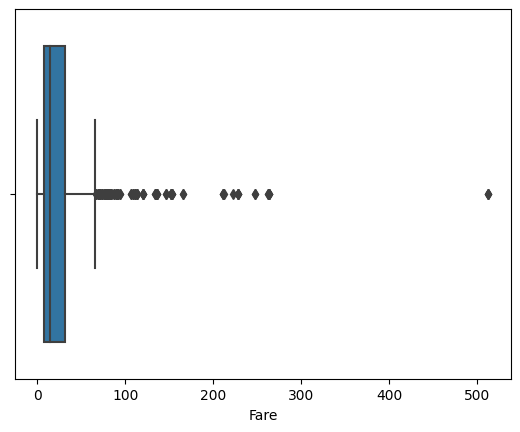

In [ ]:
sns.boxplot(x = dataframe["Fare"])

In [ ]:
hi_filter = dataframe['Fare'].quantile(0.99)
print(hi_filter)

249.00622000000035


In [ ]:
lo_filter = dataframe['Fare'].quantile(0.1)
print(lo_filter)

7.55


In [ ]:
dataframe = dataframe[(dataframe['Fare']>lo_filter) & (dataframe['Fare']<hi_filter)]

<Axes: xlabel='Fare'>

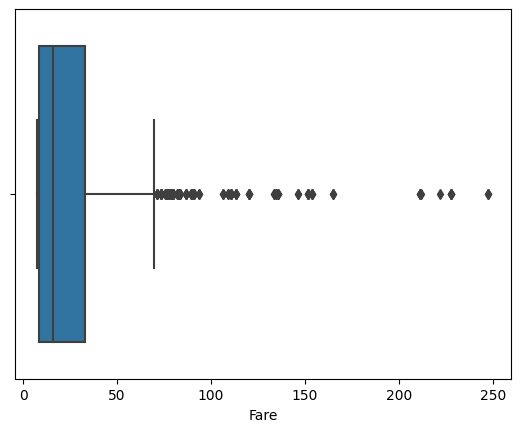

In [ ]:
sns.boxplot(x = dataframe['Fare'])

In [ ]:
dataframe.corr(method = 'pearson')

<ipython-input-37-82f0c4aa5829>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr(method = 'pearson')


,PassengerId,Survived,Pclass,Age,Fare,Fare_StandardScaler,Fare_MinMaxScaler,Sex_OrdinalEncoder,Sex_female,Sex_male
PassengerId,1.000000,0.000315,-0.036900,0.032546,0.031494,0.031494,0.031494,0.038375,-0.038375,0.038375
Survived,0.000315,1.000000,-0.333400,-0.058089,0.250934,0.250934,0.250934,-0.523998,0.523998,-0.523998
Pclass,-0.036900,-0.333400,1.000000,-0.350459,-0.621819,-0.621819,-0.621819,0.104901,-0.104901,0.104901
Age,0.032546,-0.058089,-0.350459,1.000000,0.115538,0.115538,0.115538,0.074179,-0.074179,0.074179
Fare,0.031494,0.250934,-0.621819,0.115538,1.000000,1.000000,1.000000,-0.195870,0.195870,-0.195870
Fare_StandardScaler,0.031494,0.250934,-0.621819,0.115538,1.000000,1.000000,1.000000,-0.195870,0.195870,-0.195870
Fare_MinMaxScaler,0.031494,0.250934,-0.621819,0.115538,1.000000,1.000000,1.000000,-0.195870,0.195870,-0.195870
Sex_OrdinalEncoder,0.038375,-0.523998,0.104901,0.074179,-0.195870,-0.195870,-0.195870,1.000000,-1.000000,1.000000
Sex_female,-0.038375,0.523998,-0.104901,-0.074179,0.195870,0.195870,0.195870,-1.000000,1.000000,-1.000000
Sex_male,0.038375,-0.523998,0.104901,0.074179,-0.195870,-0.195870,-0.195870,1.000000,-1.000000,1.000000


<ipython-input-38-0326387b8e91>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(method = 'pearson'), annot = True)


<Axes: >

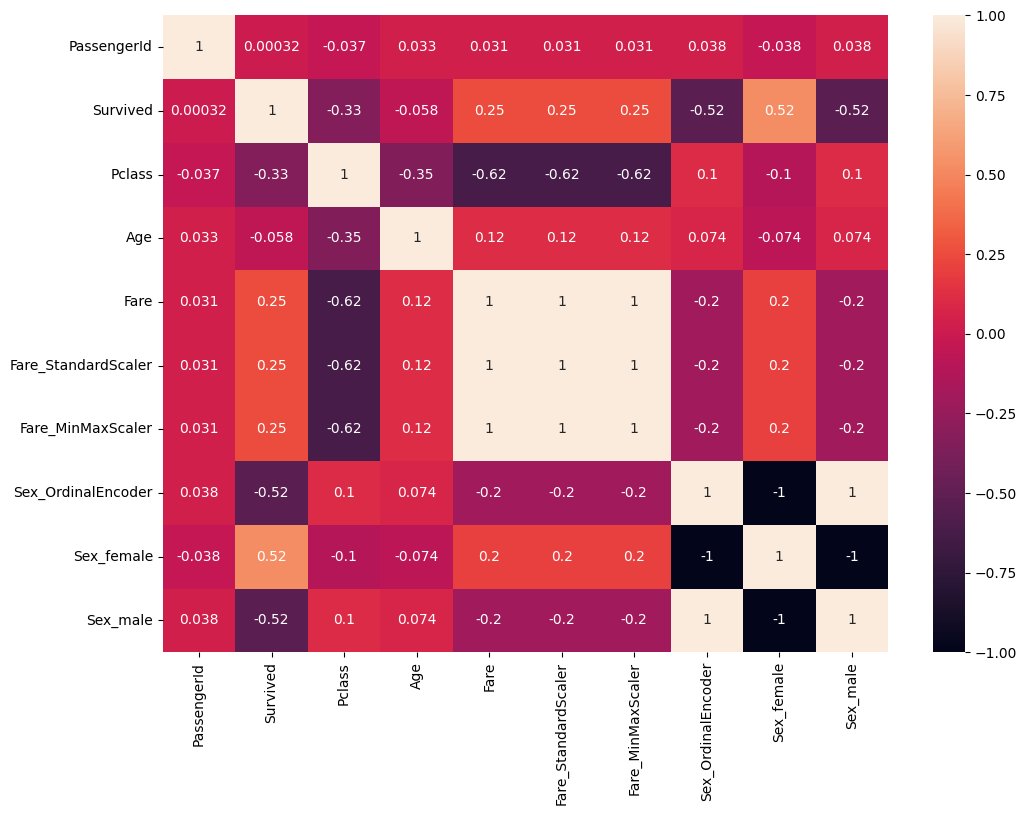

In [ ]:
a4_dim = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dim)
sns.heatmap(dataframe.corr(method = 'pearson'), annot = True)

In [ ]:
dataframe.corr(method = 'spearman')

<ipython-input-39-e93676cc3d33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr(method = 'spearman')


,PassengerId,Survived,Pclass,Age,Fare,Fare_StandardScaler,Fare_MinMaxScaler,Sex_OrdinalEncoder,Sex_female,Sex_male
PassengerId,1.000000,0.000339,-0.036855,0.034856,0.019586,0.019586,0.019586,0.038771,-0.038771,0.038771
Survived,0.000339,1.000000,-0.334983,-0.022424,0.278947,0.278947,0.278947,-0.523998,0.523998,-0.523998
Pclass,-0.036855,-0.334983,1.000000,-0.327432,-0.712763,-0.712763,-0.712763,0.107978,-0.107978,0.107978
Age,0.034856,-0.022424,-0.327432,1.000000,0.142285,0.142285,0.142285,0.054452,-0.054452,0.054452
Fare,0.019586,0.278947,-0.712763,0.142285,1.000000,1.000000,1.000000,-0.196611,0.196611,-0.196611
Fare_StandardScaler,0.019586,0.278947,-0.712763,0.142285,1.000000,1.000000,1.000000,-0.196611,0.196611,-0.196611
Fare_MinMaxScaler,0.019586,0.278947,-0.712763,0.142285,1.000000,1.000000,1.000000,-0.196611,0.196611,-0.196611
Sex_OrdinalEncoder,0.038771,-0.523998,0.107978,0.054452,-0.196611,-0.196611,-0.196611,1.000000,-1.000000,1.000000
Sex_female,-0.038771,0.523998,-0.107978,-0.054452,0.196611,0.196611,0.196611,-1.000000,1.000000,-1.000000
Sex_male,0.038771,-0.523998,0.107978,0.054452,-0.196611,-0.196611,-0.196611,1.000000,-1.000000,1.000000


<ipython-input-40-a24c2320a211>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(method = 'spearman'), annot = True)


<Axes: >

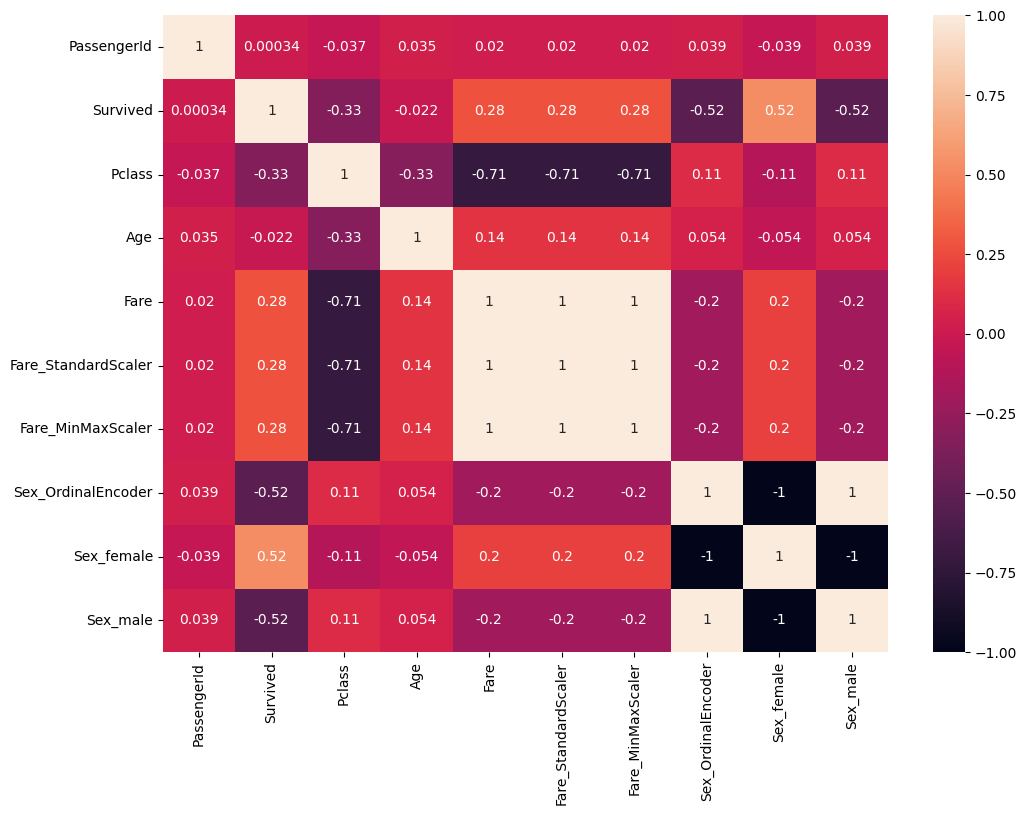

In [ ]:
a4_dim = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dim)
sns.heatmap(dataframe.corr(method = 'spearman'), annot = True)

In [ ]:
x = dataframe[['Age', 'Fare_MinMaxScaler', 'Sex_OrdinalEncoder']]
x

,Age,Fare_MinMaxScaler,Sex_OrdinalEncoder
1,38.000000,0.139136,0.0
2,26.000000,0.015469,0.0
3,35.000000,0.103644,0.0
4,35.000000,0.015713,1.0
5,29.699118,0.016510,1.0
...,...,...,...
886,27.000000,0.025374,1.0
887,19.000000,0.058556,0.0
888,29.699118,0.045771,0.0
889,26.000000,0.058556,1.0


In [ ]:
y = dataframe['Survived']
y

1      1
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 790, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [ ]:
x_train

,Age,Fare_MinMaxScaler,Sex_OrdinalEncoder
230,35.000000,0.162932,0.0
146,27.000000,0.015216,1.0
840,20.000000,0.015469,1.0
602,29.699118,0.082759,1.0
62,45.000000,0.162932,1.0
...,...,...,...
78,0.830000,0.056604,1.0
115,21.000000,0.015469,1.0
299,50.000000,0.483128,0.0
488,30.000000,0.015713,1.0


In [ ]:
y_train

230    1
146    1
840    0
602    0
62     0
      ..
78     1
115    0
299    1
488    0
111    0
Name: Survived, Length: 632, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
# Criando a rede neural
model = Sequential()
model.add(Dense(8, input_dim=3, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='softmax')) # 2 classes: Morreu, Sobreviveu

In [ ]:
# Compilando o modelo
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Treinando a rede neural
history = model.fit(x_train, y_train,
                    epochs=200, batch_size= 2,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/200
316/316 [==============================] - 5s 7ms/step - loss: 1.0399 - accuracy: 0.5981 - val_loss: 0.6859 - val_accuracy: 0.6266
Epoch 2/200
316/316 [==============================] - 2s 5ms/step - loss: 0.6819 - accuracy: 0.6028 - val_loss: 0.6772 - val_accuracy: 0.6203
Epoch 3/200
316/316 [==============================] - 2s 7ms/step - loss: 0.6773 - accuracy: 0.5981 - val_loss: 0.6640 - val_accuracy: 0.6329
Epoch 4/200
316/316 [==============================] - 2s 6ms/step - loss: 0.6676 - accuracy: 0.6028 - val_loss: 0.6565 - val_accuracy: 0.6329
Epoch 5/200
316/316 [==============================] - 2s 6ms/step - loss: 0.6613 - accuracy: 0.6044 - val_loss: 0.6496 - val_accuracy: 0.6139
Epoch 6/200
316/316 [==============================] - 3s 8ms/step - loss: 0.6516 - accuracy: 0.6123 - val_loss: 0.6334 - val_accuracy: 0.6266
Epoch 7/200
316/316 [==============================] - 2s 5ms/step - loss: 0.6369 - accuracy: 0.6297 - val_loss: 0.6237 - val_accuracy: 0.6076

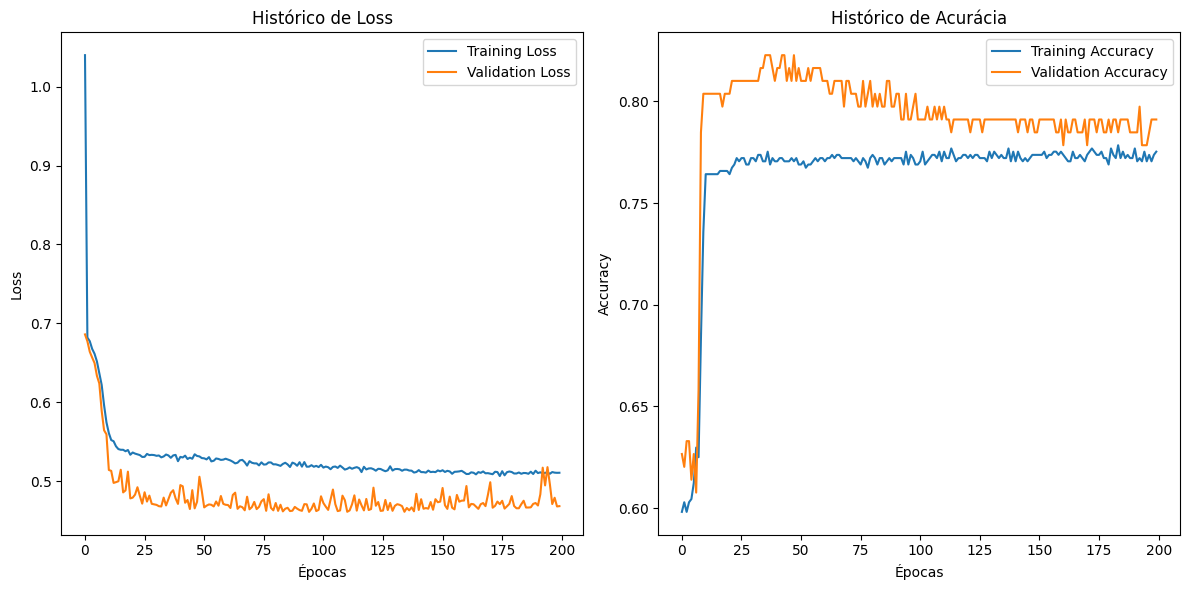

In [ ]:
# Plotando o histórico de perda (loss)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Histórico de Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Plotando o histórico de acurácia
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Histórico de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Avaliando a rede neural
accuracy = model.evaluate(x_test, y_test)[1]
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

5/5 [==============================] - 1s 5ms/step - loss: 0.4681 - accuracy: 0.7911
Acurácia do modelo: 79.11%


In [ ]:
38.000000	0.139136	0.0
20.000000	0.015469	1.0

In [ ]:
idade = float(input('Digite a idade: '))
podeAquisitivo = float(input('Digite o poder aquisitivo: '))
sexo = float(input('Digite o sexo: '))

print(idade, podeAquisitivo, sexo)

exemplo_fruta = [[idade,podeAquisitivo,sexo]]

Digite a idade: 38
Digite o poder aquisitivo: 0.13
Digite o sexo: 0
38.0 0.13 0.0


In [ ]:
# Realizando uma predição
resultado = model.predict(exemplo_fruta)

1/1 [==============================] - 0s 40ms/step


In [ ]:
resultado

array([[0.21967201, 0.78032804]], dtype=float32)

In [ ]:
resultado_convertido = np.argmax(resultado, axis=1)

In [ ]:
resultado_convertido


array([1])

In [ ]:
if str(resultado_convertido) == '[1]': print('Sobreviveu')
else: print('Não sobreviveu')

Sobreviveu
